In [2]:
#from mylib import *
from hexalattice.hexalattice import *
import matplotlib.pyplot as plt

base_dir = "/mnt/z/Users/Kevin/Pictures/tbg/"

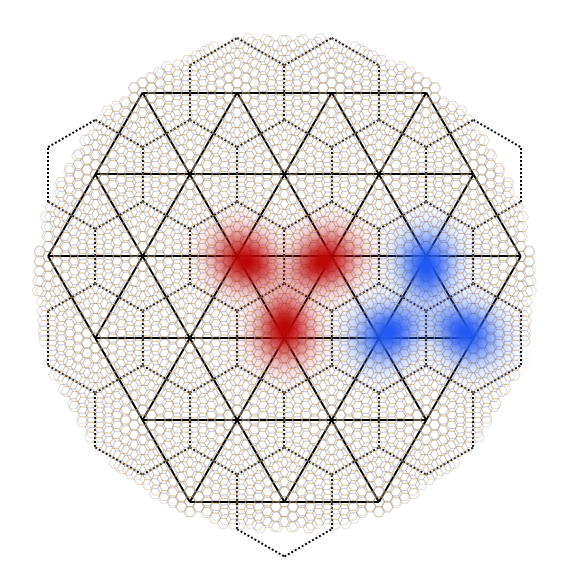

In [268]:
inverse_lattice = 6/180 * np.pi

fig, ax = plt.subplots(1, 1, figsize=[8, 8])

grid1, _ = create_hex_grid(
    nx=70,
    ny=70,
    rotate_deg=-33,
    min_diam=1,
)

grid2, _ = create_hex_grid(
    nx=70,
    ny=70,
    min_diam=1,
    rotate_deg=-27,
)

neworigin = 1 / inverse_lattice / np.sqrt(3)
latticeconstant = 1 / inverse_lattice / np.sqrt(3)

rad = ((grid1[:, 0])**2 + (grid1[:, 1] - neworigin)**2)**0.5
grid1 = grid1[rad.flatten() <= 25, :]
rad = ((grid2[:, 0])**2 + (grid2[:, 1] - neworigin)**2)**0.5
grid2 = grid2[rad.flatten() <= 25, :]

plot_single_lattice(grid1[:, 0], grid1[:, 1] - neworigin, face_color=None, edge_color=(150/255,147/255,181/255, 0.3), min_diam=1, plotting_gap=0, rotate_deg=-33, h_ax=ax)
plot_single_lattice(grid2[:, 0], grid2[:, 1] - neworigin, face_color=None, edge_color=(179/255,143/255,68/255, 0.3), min_diam=1, plotting_gap=0, rotate_deg=-27, h_ax=ax)



#plt.axvline(1 / inverse_lattice / 2)



from matplotlib.colors import LinearSegmentedColormap


X, Y = np.meshgrid(np.linspace(-5, 5, 1000), np.linspace(-5, 5, 1000))
R = 2
Z = np.exp(-(Y-R)**2 - X**2) + \
    np.exp(-(Y+R/2)**2 - (X+R*np.sqrt(3)/2)**2) + \
    np.exp(-(Y+R/2)**2 - (X-R*np.sqrt(3)/2)**2)
Z = Z / (X ** 2 + Y ** 2 + 0.7)

extent = 15

def to_rgba(hex, alpha):
    return ((hex >> 16) / 256, ((hex >> 8) & 0xFF) / 256, (hex & 0xFF) / 256, alpha)

colorAB = 0xbd0708
colorBA = 0x235af4

map_object = LinearSegmentedColormap.from_list(name='rainbow_alpha', colors=[ to_rgba(colorAB, 0), to_rgba(colorAB, 1),])
plt.register_cmap(cmap=map_object)
ax.imshow(Z, cmap='rainbow_alpha', extent=(-extent, extent, -extent, extent), zorder=1)

map_object = LinearSegmentedColormap.from_list(name='rainbow_alpha', colors=[ to_rgba(colorBA, 0), to_rgba(colorBA, 1),])
plt.register_cmap(cmap=map_object)
ax.imshow(Z, cmap='rainbow_alpha', extent=(3 * np.sqrt(3) / 2 * latticeconstant -extent, 3 * np.sqrt(3) / 2 * latticeconstant +extent, -latticeconstant / 2 + extent, -latticeconstant/ 2-extent), zorder=1)




def draw_hexalattice():
    from matplotlib import collections as mc
    Hexa = []
    HexaLines = []

    for y in range(-3, 3, 1):
        for x in range(6 - abs(y)):
            Hexa.append((latticeconstant * np.sqrt(3) * (x - 1/2 - 2) + latticeconstant * np.sqrt(3) / 2 * abs(y),
                         latticeconstant *  np.sqrt(3) * y * np.sqrt(3) / 2 + latticeconstant / 2))
            if x != 0:
                HexaLines.append((len(Hexa) - 2, len(Hexa) - 1))
            if y > 0:
                HexaLines.append((len(Hexa) - 1, len(Hexa) - (6 - abs(y) + 1)))
                HexaLines.append((len(Hexa) - 1, len(Hexa) - (6 - abs(y) + 2)))
            if y < 0:
                HexaLines.append((len(Hexa) - 1, len(Hexa) + (6 - abs(y))))
                HexaLines.append((len(Hexa) - 1, len(Hexa) + (6 - abs(y) - 1)))

    ax.add_collection(mc.LineCollection([(Hexa[x], Hexa[y]) for x, y in HexaLines], color='k', lw=2, zorder=0.5))
    
    
def draw_duallattice():
    from matplotlib import collections as mc
    Dual = []
    DualLines = []

    for y in range(-3, 4):
        if y == 3: lim = (0, 5)
        elif y == 2: lim = (-2, 9)
        elif y == 1: lim = (-1, 10)
        elif y == 0: lim = (0, 11)
        elif y == -1: lim = (-1, 10)
        elif y == -2: lim = (-1, 8)
        else: lim = (1, 4)
            
        for x in range(*lim):
            Dual.append(
                (
                    latticeconstant * np.sqrt(3) * (x - 5) / 2 + latticeconstant * np.sqrt(3) / 2 * abs(y),
                    (latticeconstant * np.sqrt(3) * y * np.sqrt(3) / 2 -
                         (latticeconstant * np.sqrt(3) / np.sqrt(3) if x % 2 == 0 else latticeconstant * np.sqrt(3) * np.sqrt(3) / 2 - latticeconstant * np.sqrt(3) / np.sqrt(3))
                    ) +  latticeconstant / 2
                )
            )
            if x != lim[0]:
                DualLines.append((len(Dual) - 2, len(Dual) - 1))

    for i in range(2):
        DualLines.append((i * 2, i * 2 + 6))
        
    for i in range(5):
        DualLines.append((3 + i * 2, 3 + i * 2 + 10))
        
    for i in range(6):
        DualLines.append((12 + i * 2, 12 + i * 2 + 11))
        DualLines.append((34 + i * 2, 34 + i * 2 + 11))
    
    for i in range(5):
        DualLines.append((24 + i * 2, 24 + i * 2 + 11))
    
    for i in range(3):
        DualLines.append((48 + i * 2, 48 + i * 2 + 8))
                
    ax.add_collection(mc.LineCollection([(Dual[x], Dual[y]) for x, y in DualLines], color='k', lw=2, ls=(0, (1, 1)), zorder=0.5))

    
draw_hexalattice()
draw_duallattice()
ax.set_xlim([-28, 28])
ax.set_ylim([-28, 28])



ax.axis('off')

plt.tight_layout()
plt.savefig(base_dir + "fig1.png", dpi=300)
plt.savefig(base_dir + "fig1.svg", dpi=300)


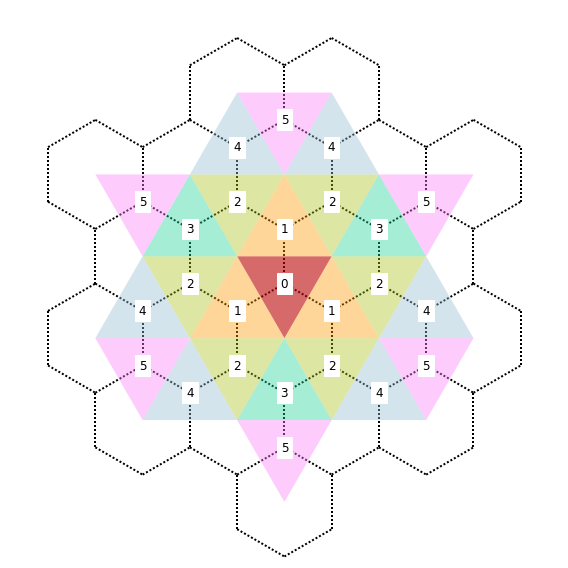

In [271]:
fig, ax = plt.subplots(1, 1, figsize=[8, 8])
ax.set_xlim([-28, 28])
ax.set_ylim([-28, 28])

import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "sans-serif"
plt.rcParams["font.sans-serif"] = "DejaVu Sans"

def adddowntri(xy, color, name):
    xy = (
        xy[0] * np.sqrt(3) * latticeconstant + xy[1] * np.sqrt(3) * latticeconstant / 2,
        xy[1] * np.sqrt(3) * latticeconstant * np.sqrt(3) / 2
    )
    polygon = mpatches.RegularPolygon(xy, numVertices=3,
        radius=latticeconstant,
        orientation=np.pi, facecolor=color)
    
    ax.text(xy[0], xy[1], name + "", fontsize=12, horizontalalignment='center', verticalalignment='center', bbox=dict(color='white'), zorder=1)

    ax.add_patch(polygon)
    
def adduptri(xy, color, name):
    xy = (
        (xy[0] + 1/2) * np.sqrt(3) * latticeconstant + xy[1] * np.sqrt(3) * latticeconstant / 2,
        xy[1] * np.sqrt(3) * latticeconstant * np.sqrt(3) / 2 - latticeconstant / 2
    )
    polygon = mpatches.RegularPolygon(xy, numVertices=3,
        radius=latticeconstant,
        orientation=0, facecolor=color)
    
    ax.text(xy[0], xy[1], name + "", fontsize=12, horizontalalignment='center', verticalalignment='center', bbox=dict(color='white'), zorder=1)

    ax.add_patch(polygon)

trialpha = 0.4
adddowntri((0, 0), to_rgba(colorAB, 0.6), "0")

color1 = 0xfe9a04
color2 = 0xabc318
color3 = 0x1fd599
color4 = 0x94bed4
color5 = 0xfd81fb

adduptri((0, 0), to_rgba(color1, trialpha), "1")
adduptri((-1, 0), to_rgba(color1, trialpha), "1")
adduptri((-1, 1), to_rgba(color1, trialpha), "1")

adddowntri((1, 0), to_rgba(color2, trialpha), "2")
adddowntri((-1, 0), to_rgba(color2, trialpha), "2")
adddowntri((0, 1), to_rgba(color2, trialpha), "2")
adddowntri((-1, 1), to_rgba(color2, trialpha), "2")
adddowntri((1, -1), to_rgba(color2, trialpha), "2")
adddowntri((0, -1), to_rgba(color2, trialpha), "2")

adduptri((0, 1), to_rgba(color3, trialpha), "3")
adduptri((-2, 1), to_rgba(color3, trialpha), "3")
adduptri((0, -1), to_rgba(color3, trialpha), "3")

adduptri((-1, 2), to_rgba(color4, trialpha), "4")
adduptri((-2, 2), to_rgba(color4, trialpha), "4")
adduptri((1, 0), to_rgba(color4, trialpha), "4")
adduptri((-2, 0), to_rgba(color4, trialpha), "4")
adduptri((1, -1), to_rgba(color4, trialpha), "4")
adduptri((-1, -1), to_rgba(color4, trialpha), "4")

adddowntri((-1, 2), to_rgba(color5, trialpha), "5")
adddowntri((-2, 1), to_rgba(color5, trialpha), "5")
adddowntri((1, 1), to_rgba(color5, trialpha), "5")
adddowntri((-1, -1), to_rgba(color5, trialpha), "5")
adddowntri((2, -1), to_rgba(color5, trialpha), "5")
adddowntri((1, -2), to_rgba(color5, trialpha), "5")


ax.axis('off')
ax.set_aspect('equal')
draw_duallattice()
plt.tight_layout()
plt.savefig(base_dir + "fig1b.png", dpi=300)
plt.savefig(base_dir + "fig1b.svg", dpi=300)

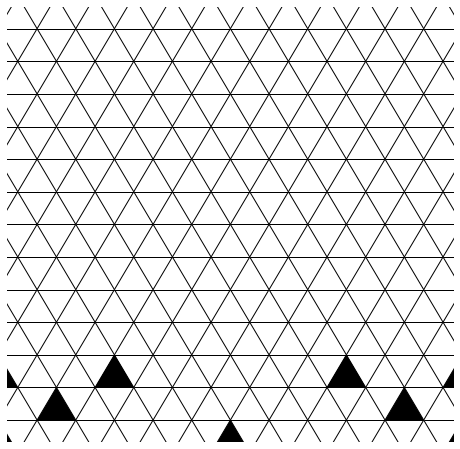

In [385]:
R = 1

def draw_hexalattice():
    from matplotlib import collections as mc
    Hexa = []
    HexaLines = []

    for y in range(-8, 9, 1):
        xlen = 20
        xrange = (-(y // 2) - xlen // 2, -(y // 2) + xlen - xlen // 2)
        
        for x in range(xrange[0], xrange[1]):
            Hexa.append((R * np.sqrt(3) * x + R * np.sqrt(3) / 2 * y,
                         R *  np.sqrt(3) * y * np.sqrt(3) / 2 + R / 2))
            
            if x != xrange[0]:
                HexaLines.append((len(Hexa) - 2, len(Hexa) - 1))
            
            if y % 2 == 1:
                HexaLines.append((len(Hexa) - 1, len(Hexa) - xlen - 1))
                if x < xrange[1] - 1:
                    HexaLines.append((len(Hexa) - 1, len(Hexa) - xlen))
            elif y > -8:
                HexaLines.append((len(Hexa) - 1, len(Hexa) - xlen - 1))
                if x > xrange[0]:
                    HexaLines.append((len(Hexa) - 1, len(Hexa) - xlen - 2))
                

    ax.add_collection(mc.LineCollection([(Hexa[x], Hexa[y]) for x, y in HexaLines], color='k', lw=1, zorder=0.5))

def adddowntri(xy, color, name):
    xy = (
        xy[0] * np.sqrt(3) * R + xy[1] * np.sqrt(3) * R / 2,
        xy[1] * np.sqrt(3) * R * np.sqrt(3) / 2
    )
    polygon = mpatches.RegularPolygon(xy, numVertices=3,
        radius=R,
        orientation=np.pi, facecolor=color)
    
    #ax.text(xy[0], xy[1], name + "", fontsize=12, horizontalalignment='center', verticalalignment='center', bbox=dict(color='white'), zorder=1)

    ax.add_patch(polygon)
    
def adduptri(xy, color, name):
    xy = (
        xy[0] * np.sqrt(3) * R + xy[1] * np.sqrt(3) * R / 2,
        xy[1] * np.sqrt(3) * R * np.sqrt(3) / 2 - R / 2
    )
    polygon = mpatches.RegularPolygon(xy, numVertices=3,
        radius=R,
        orientation=0, facecolor=color)
    
    #ax.text(xy[0], xy[1], name + "", fontsize=12, horizontalalignment='center', verticalalignment='center', bbox=dict(color='white'), zorder=1)

    ax.add_patch(polygon)
    


    
fig, ax = plt.subplots(1, 1, figsize=[8, 8])



rt3 = [
    (-1, -4), (5, -4),
    (-1, -4), (5, -4),
    (-4, -4), (-1, -4), (5, -4), (8, -4),
    (-2, -5), (7, -5), 
    (-3, -6), (3, -6), (9, -6)
]
    
for i in rt3:
    adduptri(i, "black", "")


ax.set_xlim([-10, 10])
ax.set_ylim([-9.5, 10.5])
ax.axis("off")
draw_hexalattice()

In [303]:
-10 // 2

-5

In [298]:
10 // 2

5

In [299]:
-11 / 2

-5.5

In [300]:
-11 // 2

-6